# US map of the treat/control sample

In [1]:
import os
import numpy as np
import astropy.table as aTable
import geopandas

In [2]:
import corner as DFM
# --- plotting ---
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False

## read FEMA and the compiled datasets

In [3]:
fema = aTable.Table.read('../../dat/fema.zipcode.csv', format='csv')

In [4]:
data = aTable.Table.read('../../dat/zipcode.fema.fsf.acs.rainfall.v2.csv', format='csv')
print('%i entries; %i unique zipcodes' % (len(data), len(np.unique(data['reportedZipcode']))))

74288 entries; 14729 unique zipcodes


In [5]:
control = (data['communityRatingSystemDiscount'] == 11.)
print(f"{np.sum(control)} entries in control; {len(np.unique(data['reportedZipcode'][control]))} unique zipcodes")

treat = (data['communityRatingSystemDiscount'] < 11.)
print(f"{np.sum(treat)} entries in control; {len(np.unique(data['reportedZipcode'][treat]))} unique zipcodes")

43644 entries in control; 11258 unique zipcodes
30644 entries in control; 5040 unique zipcodes


In [6]:
columns = ['amountPaidOnTotalClaim_per_policy', 'mean_rainfall', 'avg_risk_score_all', 'median_household_income', 'population'] 

read state borders in geopandas

In [7]:
# https://github.com/joncutrer/geopandas-tutorial/blob/master/data/usa-states-census-2014.shp
states = geopandas.read_file('../../dat/usa-states-census-2014.shp')

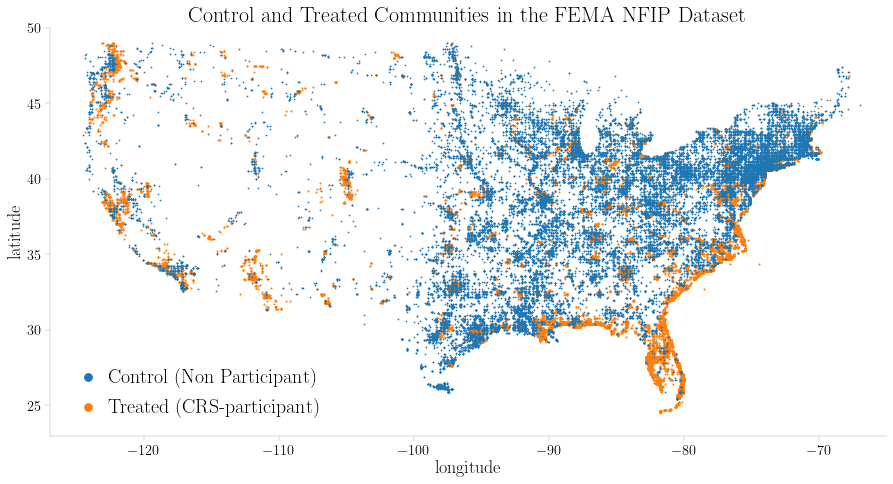

In [11]:
xlim = (-127, -65)
ylim = (23, 50) 

fig = plt.figure(figsize=(15,7.5))
sub = fig.add_subplot(111)

sub.scatter(data['longitude'][treat], data['latitude'][treat], c='C1', s=1, rasterized=True)
sub.scatter(data['longitude'][control], data['latitude'][control], c='C0', s=0.5, rasterized=True)
sub.set_xlabel('longitude', fontsize=18)
sub.set_ylabel('latitude', fontsize=18)
sub.set_xlim(xlim)
sub.set_ylim(ylim)
#sub.axis('off')
sub.scatter([], [], c='C0', s=60, label='Control (Non Participant)')
sub.scatter([], [], c='C1', s=60, label='Treated (CRS-participant)')
sub.legend(loc='lower left', handletextpad=0, fontsize=20)

sub.spines['top'].set_linewidth(0)
sub.spines['right'].set_linewidth(0)
sub.spines['bottom'].set_linewidth(0.3)
sub.spines['left'].set_linewidth(0.3)
sub.spines['bottom'].set_color('gray')
sub.spines['left'].set_color('gray')
sub.tick_params(width=0.3, color='gray')

sub.set_title('Control and Treated Communities in the FEMA NFIP Dataset', fontsize=22)

fig.subplots_adjust(hspace=0)
fig.savefig('map1.pdf', bbox_inches='tight')